# <center><b> MGP DL1 : Patient Survival Classification Project <b></center>

---
<a name = Section0></a>
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Description**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Handling of Redundant Data**](#Section53)<br>
  - **5.4** [**Handling of Inconsisten Data**](#Section54)<br>
  - **5.5** [**Handling of Outliers**](#Section55)<br>
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>
   
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation using Deep Learning**](#Section8)<br>

**9.** [**Saving and loading the keras model**](#Section9)<br>

**10.** [**Hyperparameter Tuning**](#Section10)<br>

---
<a name = Section1></a>
# **1. Introduction**
---


- Getting a rapid understanding of the context of a patient’s overall health has been particularly important during the COVID-19 pandemic as healthcare workers around the world struggle with hospitals overloaded by patients in critical condition. Intensive Care Units (ICUs) often lack verified medical histories for incoming patients.

- A patient in distress or a patient who is brought in confused or unresponsive may not be able to provide information about chronic conditions such as heart disease, injuries, or diabetes. Medical records may take days to transfer, especially for a patient from another medical provider or system. Knowledge about chronic conditions can inform clinical decisions about patient care and ultimately improve patient's survival outcomes.

---
<a name = Section1></a>
# **2. Problem Statement**
---


-  The target feature is hospital_death which is a binary variable. The task is to classify this variable based on the other 84 features step-by-step by going through each day's task. 

- The scoring metric is Accuracy/Area under ROC curve.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**                                                   
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [2]:
#!pip install -q pandas-profiling 

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [3]:
#!pip install -q --upgrade datascience                               
#!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [4]:
import numpy as np
from numpy import isnan
import pandas as pd
from pandas_profiling import ProfileReport     
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter  
import seaborn as sns
import warnings                                                     
warnings.filterwarnings("ignore")
import datetime
plt.show();
from platform import python_version
import sklearn.metrics
from tqdm import tqdm
import gc
from sklearn.metrics import roc_curve, auc
import urllib
from urllib.request import urlopen
import urllib.request as ur

In [5]:
pd.set_option('display.max_columns', None)                          
pd.set_option('display.max_rows', None)                             
pd.set_option('mode.chained_assignment', None)   

In [6]:
from sklearn.preprocessing import StandardScaler                    
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV              
from sklearn.metrics import classification_report                   
from sklearn.metrics import plot_confusion_matrix                   
#import pydotplus                                                    
from IPython.display import Image                                   
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score                            
from sklearn.metrics import precision_recall_curve                  
from sklearn.metrics import confusion_matrix                        
from sklearn.metrics import f1_score                                  
from sklearn.metrics import roc_curve                               
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split                   
from sklearn.linear_model import LogisticRegression                 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel       
from sklearn.ensemble import RandomForestClassifier               
from yellowbrick.model_selection import FeatureImportances  
from imblearn.over_sampling import SMOTE

In [7]:
#Dependencies
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import sklearn as sk

<a name = Section31></a>
### **3.2 Version Check**

In [8]:
# Printing versions of Python and other packages  to ensure correct version is used for this project
print("python version", python_version())
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

python version 3.8.8
pandas version 1.2.2
numpy version 1.20.1
seaborn version 0.11.1
sklearn version 1.0.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


In [9]:
# loading the data set
df = pd.read_csv("../dataset/Dataset.csv")
df = df.replace([' ', '?', "", '-','|','#','@','!'], value=np.nan)
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [11]:
df.shape

(91713, 186)

<a name = Section42></a>
### 4.2 Data Description 

- In this section we will get **information about the data** and see some observations.          

In [12]:
df.describe().style.highlight_null(null_color = 'lime')

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.000000,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.000000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.000000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.

In [13]:
df.describe(include="object")

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
count,90318,91688,70304,91601,91713,91713,90051,90051
unique,6,2,15,5,3,8,11,10
top,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
freq,70684,49469,36962,54060,86183,50586,29999,38816


**Observations:**

- Total count/ records are  **91713** in the data.

- There are quite a no of   missing values in various columns.

In [14]:
# Only for columns of train data set
#df.columns = df.columns.str.lower().str.replace(' ', '_')

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
profile1 = ProfileReport(df=df)
profile1.to_file(output_file='Hospitaldeath-PRE-Profiling Report.html')
print('Accomplished!')s

<a name = Section52></a>
### **5.2  Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [15]:
# Check for any missing values
print(any(df.isna().sum()))

True


**Observations:**
-  Looks like there are missing values in the  dataset.

In [16]:
# Check for any missing values
#print(df[df.isna().any(axis=1)])
print(len(df[df.isna().any(axis=1)]))

91688


**Observations:**

-  As we had observed there are missing values in the dataset. 
- There are lot of  missing values in the entire dataset.

In [17]:
null_frame = pd.DataFrame(index = df.columns.values)
null_frame['Null Frequency'] = df.isnull().sum().values
percent = df.isnull().sum().values/df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
Null Frequency,0.0,0.0,0.0,0.0,4228.00,3429.00,0.0,1395.00,25.00,1334.00,21409.00,112.00,0.0,0.0,0.0,0.0,0.0,2720.00,54379.00,1662.00,1101.0,0.0,715.00,58134.00,19262.0,18853.00,70868.00,1901.00,1901.00,1037.00,1901.00,11036.00,878.00,19878.00,715.00,994.00,70868.00,70868.00,70868.00,70868.00,1234.00,18600.00,4108.00,48998.00,715.00,22012.0,67984.00,67984.00,165.00,165.00,1040.00,1040.00,145.00,145.00,67777.0,67777.0,220.00,220.00,1479.00,1479.00,385.00,385.00,333.00,333.00,67959.0,67959.0,159.00,159.00,1027.00,1027.00,2324.00,2324.00,74928.0,74928.0,3619.00,3619.00,7350.00,7350.00,2790.00,2790.00,74844.00,74844.00,4639.00,4639.00,9084.0,9084.0,4357.00,4357.00,4185.00,4185.00,74915.00,74915.00,3611.00,3611.00,7341.0,7341.0,21732.0,21732.0,49096.00,49096.00,53673.00,53673.00,10514.00,10514.00,13069.00,13069.00,10169.00,10169.00,5807.00,5807.00,15071.00,15071.00,12147.00,12147.00,11654.00,11654.00,57941.00,57941.00,68396.00,68396.00,13444.00,13444.00,9585.00,9585.00,10195

**Observations:**
- Total % for missing values in various columns as aboves

In [18]:
# Stats of dataframe
stats    = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
131,h1_bilirubin_min,181,92.265001,92.265001,float64
130,h1_bilirubin_max,181,92.265001,92.265001,float64
148,h1_lactate_max,547,91.992411,91.992411,float64
149,h1_lactate_min,536,91.992411,91.992411,float64
128,h1_albumin_max,37,91.398166,91.398166,float64
129,h1_albumin_min,37,91.398166,91.398166,float64
173,h1_pao2fio2ratio_min,3122,87.441257,87.441257,float64
172,h1_pao2fio2ratio_max,3142,87.441257,87.441257,float64
168,h1_arterial_ph_max,561,83.329517,83.329517,float64
169,h1_arterial_ph_min,579,83.329517,83.329517,float64


**Observations:**

-  There are lot of missing values in the  dataset. 

In [19]:
for c in df.select_dtypes(exclude=['object', 'datetime64[ns]']):
    print("col is",c)
    if df[c].isna().sum() != 0:
        #print(c)
        med_c = df[c].median()
        print(med_c)
        df[c]=df[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))

col is encounter_id
col is patient_id
col is hospital_id
col is hospital_death
col is age
65.0
col is bmi
27.65465458
col is elective_surgery
col is height
170.1
col is icu_id
col is pre_icu_los_days
col is readmission_status
col is weight
80.3
col is albumin_apache
2.9
col is apache_2_diagnosis
122.0
col is apache_3j_diagnosis
409.02
col is apache_post_operative
col is arf_apache
0.0
col is bilirubin_apache
0.6
col is bun_apache
19.0
col is creatinine_apache
0.98
col is fio2_apache
0.5
col is gcs_eyes_apache
4.0
col is gcs_motor_apache
6.0
col is gcs_unable_apache
0.0
col is gcs_verbal_apache
5.0
col is glucose_apache
133.0
col is heart_rate_apache
104.0
col is hematocrit_apache
33.2
col is intubated_apache
0.0
col is map_apache
67.0
col is paco2_apache
40.0
col is paco2_for_ph_apache
40.0
col is pao2_apache
103.5
col is ph_apache
7.36
col is resprate_apache
28.0
col is sodium_apache
138.0
col is temp_apache
36.5
col is urineoutput_apache
1386.2016
col is ventilated_apache
0.0
col is 

In [20]:
for co in df.select_dtypes(include=['object']):
    #print("col is",co)
    if df[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = df[co].mode()[0]
        #print(med_co)
        df[co]=df[co].replace(to_replace=np.nan, value=med_co) 

In [21]:
df.isna().sum()

encounter_id                     0
patient_id                       0
hospital_id                      0
hospital_death                   0
age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height                           0
hospital_admit_source            0
icu_admit_source                 0
icu_id                           0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
readmission_status               0
weight                           0
albumin_apache                   0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bilirubin_apache                 0
bun_apache                       0
creatinine_apache                0
fio2_apache                      0
gcs_eyes_apache                  0
gcs_motor_apache    

<a name = Section53></a>
### **5.3 Handling of Redundant Data**

- In this section, we will identify redundant data and check the proportion of it and take appropriate measures.

In [22]:
#check if any duplicate row
print('Data has duplicate Rows?', df.duplicated().any())

Data has duplicate Rows? False


In [23]:
#To get the total count of duplicate values.
df.duplicated().sum()

0

In [24]:
# We will start by first removing the duplicate rows if there are any
if df.duplicated().any() : 
    df.drop_duplicates(keep="first", inplace=True)

<a name = Section54></a>
### **5.4 Handling of Inconsistent Data**

- In this section, we will **identify inconsistency** in data and and then **take appropriate measures**.

In [25]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [26]:
# Get list of categorical variables,date  and numerical variables for the data set
catcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset = ", catcol, ". No of categorical features = ", len(catcol))
print("**********************************************************\n")
datecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset = ", datecol, ". No of datetime features = ", len(datecol))
print("**********************************************************\n")
numcol = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset = ", numcol, ". No of numerical features = ", len(numcol))

Categorical cols of dataset =  ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'] . No of categorical features =  8
**********************************************************

DateTime cols of dataset =  [] . No of datetime features =  0
**********************************************************

Numerical cols of dataset =  ['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apac

In [27]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [28]:
# Learn more about the variable brand.
print("Distinct responses for hospital_death (Frequency):", len(set(df['hospital_death'])))
print("Distinct responses for hospital_death:", set(df['hospital_death']))  

Distinct responses for hospital_death (Frequency): 2
Distinct responses for hospital_death: {0, 1}


**Observations:**

-  There are no 2 type of hospital_death

In [29]:
gc.collect()

75

In [30]:
df[df['hospital_death']==0]['gender'].value_counts()

M    45310
F    38488
Name: gender, dtype: int64

In [31]:
pd.crosstab(index=df['hospital_death'], columns=df['gender'])

gender,F,M
hospital_death,,
0,38488,45310
1,3731,4184


<a name = Section55></a>
### **5.5 Handling of Outliers**


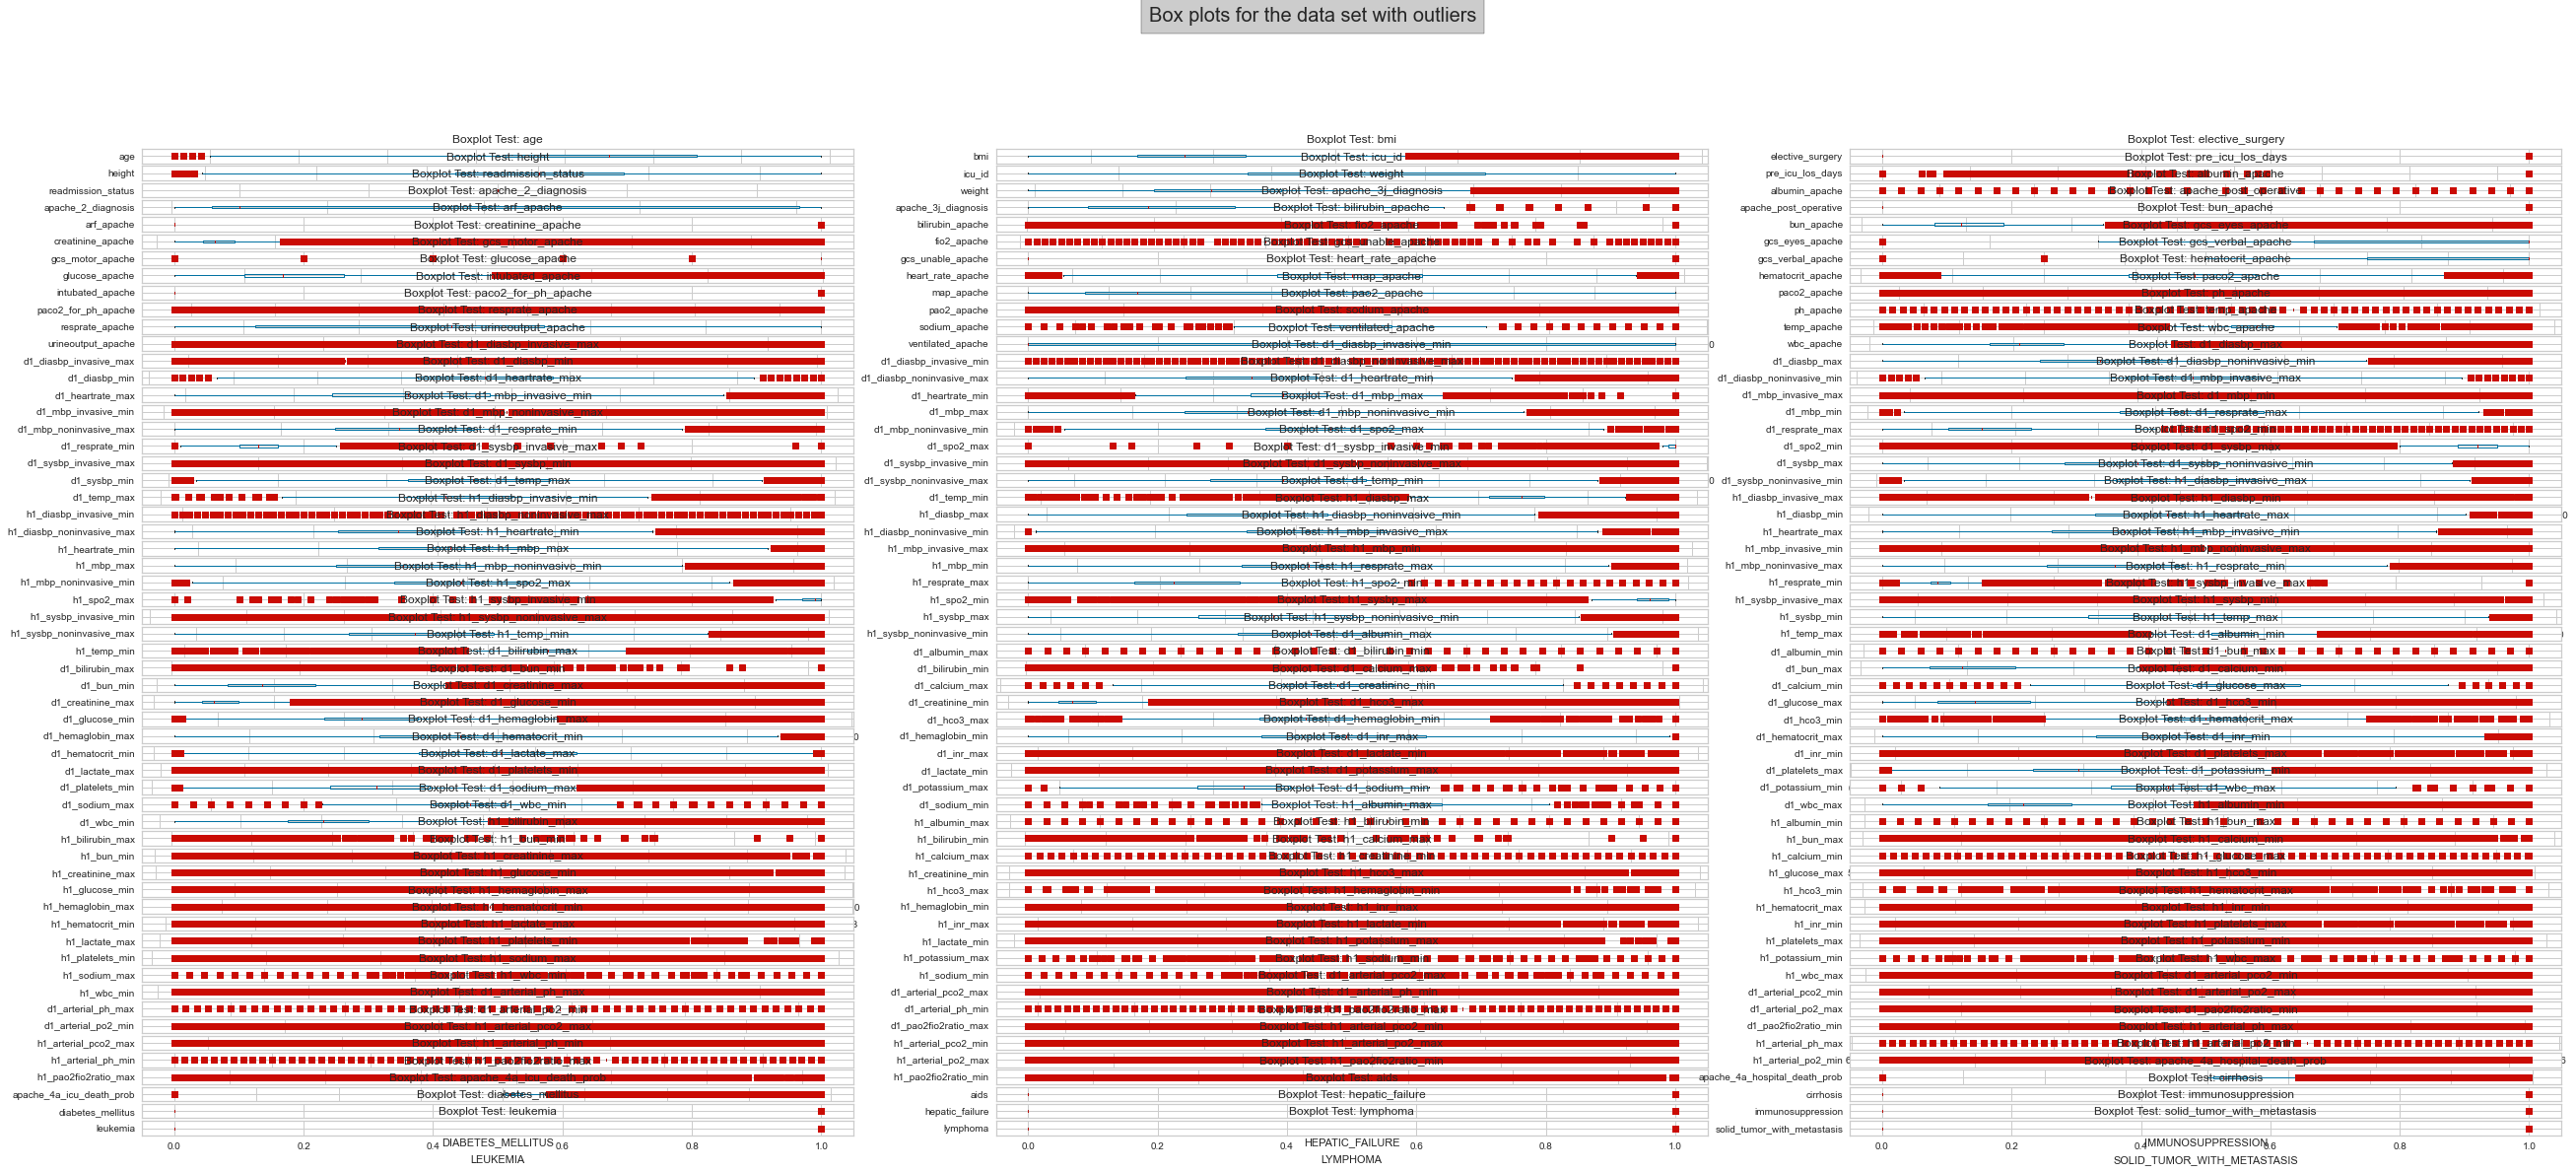

In [32]:
# for data
outcol = ['age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight',
          'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 
          'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
          'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',
          'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache',
          'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max',
          'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
          'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min',
          'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
          'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max',
          'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 
          'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 
          'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max',
          'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max',
          'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 
          'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max',
          'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max',
          'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 
          'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
          'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max',
          'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min',
          'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 
          'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',
          'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 
          'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min',
          'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 
          'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
          'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min',
          'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis',
          'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
fig = plt.figure(figsize=(44, 20))
fig.suptitle('Box plots for the data set with outliers',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
for predictor in outcol:
    ctrain_o = outcol.index(predictor)
    # print(cntss)
    subsc = fig.add_subplot(63,3, ctrain_o+1)
    subsc.set_xlabel(predictor.upper())
    # sns.boxplot(y=trainstay[predictor])
    df[predictor].plot.box(grid=True, layout=(4, 2), vert=False, sym='rs')
    subsc.title.set_text('Boxplot Test: ' + str(predictor))

In [33]:
for c in outcol:
    print(c)    
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)   
    IQR = Q3-Q1
    upper = Q3+1.5*IQR    
    lower = Q1-1.5*IQR
    print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
    # Identify outliers
    outliers = [x for x in df[c] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    #print(trainstay[c])         
    df[c][df[c]>=upper]=upper
    df[c][df[c]<=lower]=lower

age
Percentiles: 25th(Q1)=53.000, 75th(Q3)=53.000, IQR=22.000
Identified outliers: 772
bmi
Percentiles: 25th(Q1)=23.790, 75th(Q3)=23.790, IQR=8.860
Identified outliers: 3668
elective_surgery
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 16851
height
Percentiles: 25th(Q1)=162.560, 75th(Q3)=162.560, IQR=15.240
Identified outliers: 463
icu_id
Percentiles: 25th(Q1)=369.000, 75th(Q3)=369.000, IQR=310.000
Identified outliers: 0
pre_icu_los_days
Percentiles: 25th(Q1)=0.040, 75th(Q3)=0.040, IQR=0.370
Identified outliers: 15860
readmission_status
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 0
weight
Percentiles: 25th(Q1)=67.300, 75th(Q3)=67.300, IQR=29.000
Identified outliers: 2843
albumin_apache
Percentiles: 25th(Q1)=2.900, 75th(Q3)=2.900, IQR=0.000
Identified outliers: 35246
apache_2_diagnosis
Percentiles: 25th(Q1)=113.000, 75th(Q3)=113.000, IQR=188.000
Identified outliers: 0
apache_3j_diagnosis
Percentiles: 25th(Q1)=203.010, 75th(Q

h1_sysbp_max
Percentiles: 25th(Q1)=114.000, 75th(Q3)=114.000, IQR=35.000
Identified outliers: 1538
h1_sysbp_min
Percentiles: 25th(Q1)=98.000, 75th(Q3)=98.000, IQR=35.000
Identified outliers: 912
h1_sysbp_noninvasive_max
Percentiles: 25th(Q1)=115.000, 75th(Q3)=115.000, IQR=33.000
Identified outliers: 1929
h1_sysbp_noninvasive_min
Percentiles: 25th(Q1)=99.000, 75th(Q3)=99.000, IQR=33.000
Identified outliers: 1181
h1_temp_max
Percentiles: 25th(Q1)=36.500, 75th(Q3)=36.500, IQR=0.400
Identified outliers: 13099
h1_temp_min
Percentiles: 25th(Q1)=36.400, 75th(Q3)=36.400, IQR=0.400
Identified outliers: 13299
d1_albumin_max
Percentiles: 25th(Q1)=3.000, 75th(Q3)=3.000, IQR=0.000
Identified outliers: 40200
d1_albumin_min
Percentiles: 25th(Q1)=2.900, 75th(Q3)=2.900, IQR=0.000
Identified outliers: 40219
d1_bilirubin_max
Percentiles: 25th(Q1)=0.600, 75th(Q3)=0.600, IQR=0.000
Identified outliers: 34281
d1_bilirubin_min
Percentiles: 25th(Q1)=0.600, 75th(Q3)=0.600, IQR=0.000
Identified outliers: 34213
d

Identified outliers: 12174
apache_4a_icu_death_prob
Percentiles: 25th(Q1)=0.010, 75th(Q3)=0.010, IQR=0.050
Identified outliers: 13377
aids
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 78
cirrhosis
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 1428
diabetes_mellitus
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 20492
hepatic_failure
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 1182
immunosuppression
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 2381
leukemia
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 643
lymphoma
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 376
solid_tumor_with_metastasis
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 1878


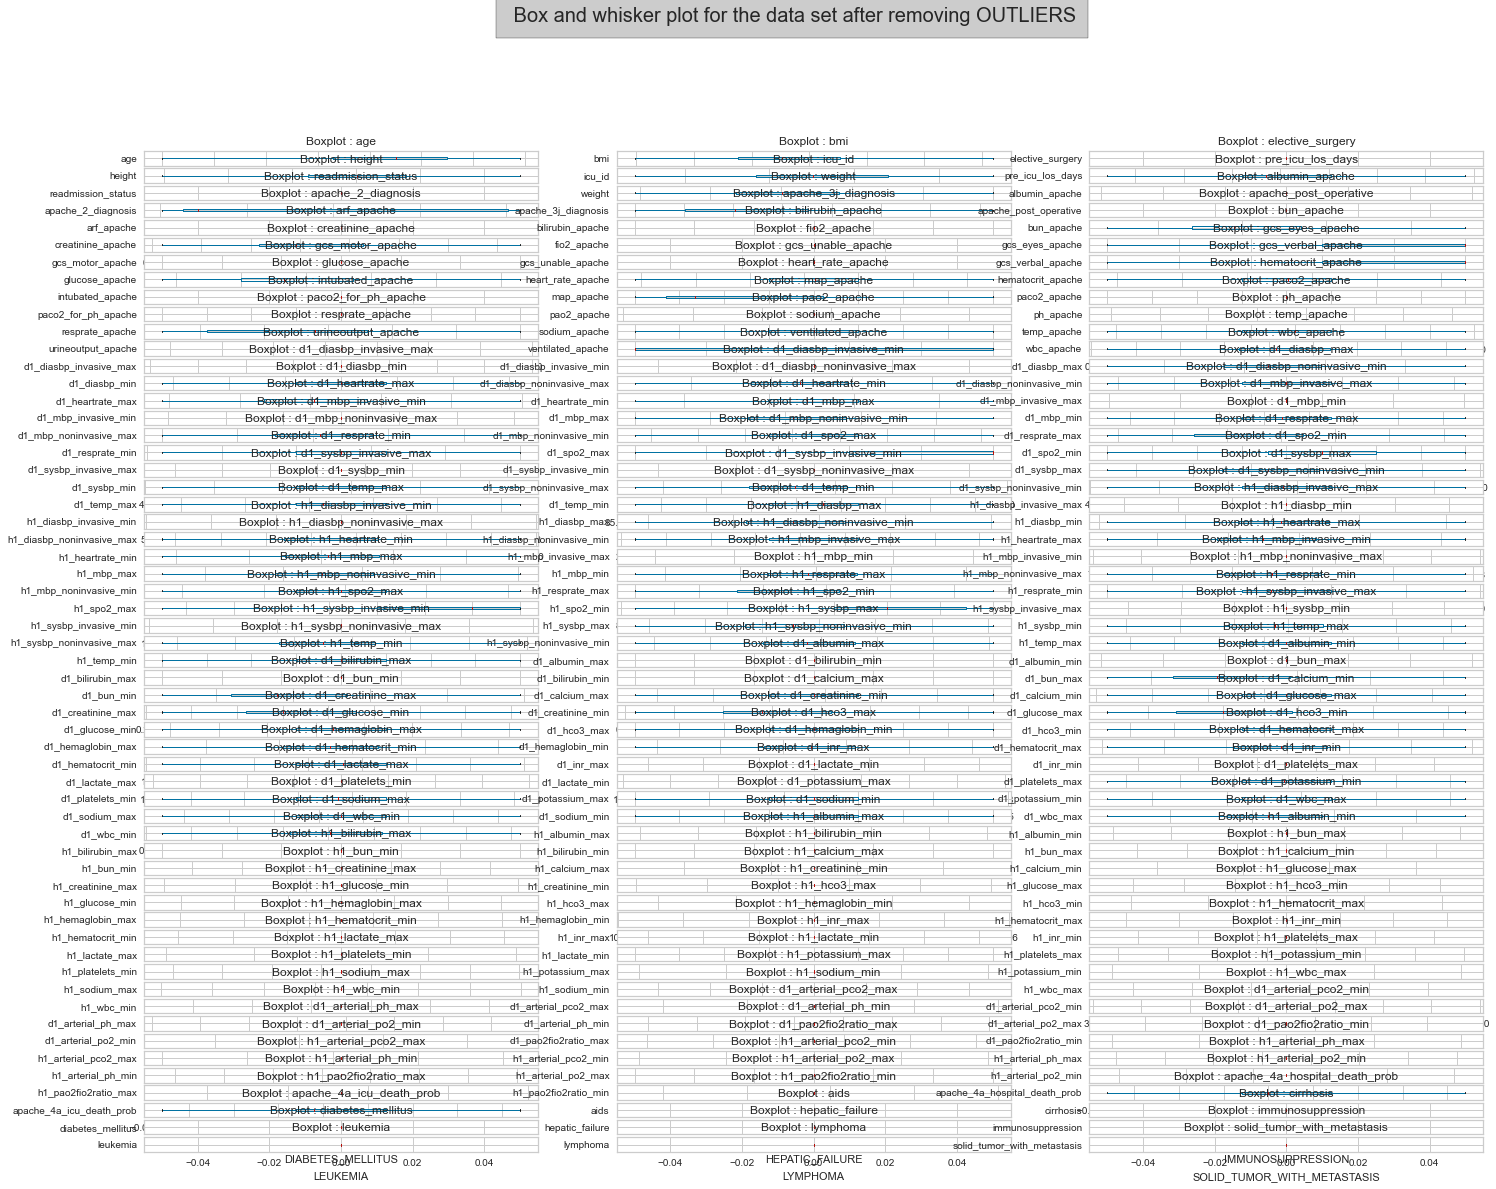

In [34]:
# for data
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot for the data set after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 20)
# Plotting scatter chart for each predictor vs the target variable
for predictor in outcol:
    ctrain = outcol.index(predictor)    
    #print(cntss)    
    subsc = fig.add_subplot(63, 3, ctrain+1)    
    subsc.set_xlabel(predictor.upper()) 
    df[predictor].plot.box(grid=True, layout=(4, 2), vert = False, sym='rs')
    #plt.show(block=True)
    subsc.title.set_text('Boxplot : '+ str(predictor))  

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

In [35]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [36]:
# Get list of categorical variables,date  and numerical variables for the data set
fcatcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset = ", catcol, ". No of categorical features = ", len(catcol))
print("*****************************************************************\n")
fdatecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset = ", datecol, ". No of datetime features = ", len(datecol))
print("*****************************************************************\n")
fnumcol = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset = ", numcol, ". No of numerical features = ", len(numcol))

Categorical cols of dataset =  ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'] . No of categorical features =  8
*****************************************************************

DateTime cols of dataset =  [] . No of datetime features =  0
*****************************************************************

Numerical cols of dataset =  ['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apa

<a name = Section7></a>

---
# **7. Data Post-Processing**

<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [37]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [38]:
df.shape

(91713, 186)

In [39]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.54,0,73.9,2.9,113.0,502.01,0,0.0,0.6,31.0,2.115,0.5,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,40.0,40.0,103.5,7.36,36.0,134.0,37.45,1386.2,0.0,14.1,75.0,46.0,68.0,37.0,68.0,37.0,119.0,72.0,101.0,62.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,80.0,151.0,92.0,131.0,73.0,131.0,73.0,38.65,37.20,66.0,55.0,68.0,63.0,68.0,63.0,119.0,108.0,90.0,74.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,86.5,136.0,112.0,131.0,115.0,131.0,115.0,37.5,37.4,3.0,2.9,0.6,0.6,31.0,30.0,8.5,7.4,2.30,2.125,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,1.3,1.21,1.9,1.5,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,3.1,3.1,0.6,0.6,18.0,18.0,8.3,8.3,1.01,1.01,140.0,134.0,23.0,23.0,11.1,11.0,33.5,33.0,1.3,1.21,2.05,2.0,181.0,181.0,4.1,4.1,139.0,138.0,12.12,12.1,42.8,37.0,7.39,7.34,127.0,85.0,272.67,205.0,42.1,41.0,7.35,7.34,120.0,107.0,223.33,214.0,0.10,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,C

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for a in fcatcol:    
    print(a)
    df[a]= le.fit_transform(df[a])

ethnicity
gender
hospital_admit_source
icu_admit_source
icu_stay_type
icu_type
apache_3j_bodysystem
apache_2_bodysystem


In [41]:
# Summarize scores
np.set_printoptions(precision=3)

In [42]:
num_feats = 10

In [43]:
X = df.drop(columns=['encounter_id','patient_id','hospital_id','hospital_death'], axis=1)
y = df['hospital_death']
print(X.shape,y.shape)


(91713, 182) (91713,)


In [44]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

10 selected features


In [45]:
print( 'selected features',embeded_rf_feature)

selected features ['apache_3j_diagnosis', 'gcs_eyes_apache', 'd1_heartrate_min', 'd1_spo2_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']


In [46]:
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier   

# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1,max_features=num_feats))
#selector.fit(feature_select, y)
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()
#selected_feat = feature_select.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 85
Threshold set by Model: 0.01
Features: ['age', 'bmi', 'height', 'icu_id', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvas

Feature Score of apache_2_bodysystem : 0.04498178256019459
Feature Score of apache_3j_bodysystem : 0.03688551631035304
Feature Score of solid_tumor_with_metastasis : 0.018940611828456105
Feature Score of lymphoma : 0.01866967485166235
Feature Score of leukemia : 0.01851860490073472
Feature Score of immunosuppression : 0.01761046387398452
Feature Score of hepatic_failure : 0.01608433076445577
Feature Score of diabetes_mellitus : 0.015300278507192204
Feature Score of cirrhosis : 0.014734408606457982
Feature Score of aids : 0.014503449023475466
Feature Score of apache_4a_icu_death_prob : 0.013912930469479737
Feature Score of apache_4a_hospital_death_prob : 0.013097114314852948
Feature Score of h1_pao2fio2ratio_min : 0.013044539204460318
Feature Score of h1_pao2fio2ratio_max : 0.01290470864775217
Feature Score of h1_arterial_po2_min : 0.012820459905666097
Feature Score of h1_arterial_po2_max : 0.01252885152031538
Feature Score of h1_arterial_ph_min : 0.012375939276362644
Feature Score of h

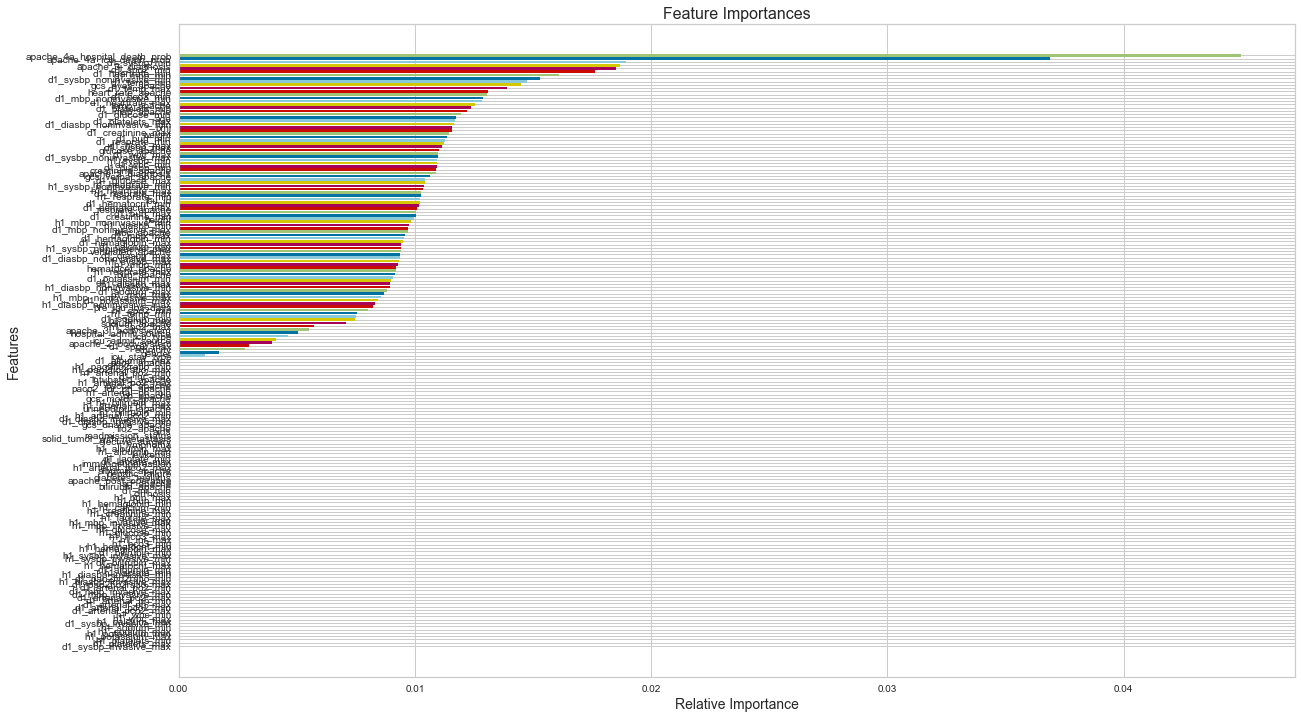

In [47]:
#Visualization of Important Features:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)

#viz.fit(feature_select, y)
viz.fit(X, y)

importance = viz.feature_importances_ 
# summarize feature importance
# Creating a list of feature names
feature_names = X.columns

for score, name in sorted(zip(importance, feature_names), reverse=True):
    print('Feature Score of', name, ':', score)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()


In [48]:
# Extract impactful columns (large coefs)
lr_coefs = [(col, coef, pos) for pos, (col, coef) in enumerate(zip(feature_names, importance))]
top_ = sorted(lr_coefs, key = lambda x: -abs(x[1]))[:10]
top_columns = [name for name, coef, pos in top_]
top_column_pos = [pos for name, coef, pos in top_]

print(top_columns, "\n")
print(top_column_pos)

['apache_2_bodysystem', 'apache_3j_bodysystem', 'solid_tumor_with_metastasis', 'lymphoma', 'leukemia', 'immunosuppression', 'hepatic_failure', 'diabetes_mellitus', 'cirrhosis', 'aids'] 

[181, 180, 179, 178, 177, 176, 175, 174, 173, 172]


In [49]:
top_columns.remove("apache_3j_bodysystem")
top_columns

['apache_2_bodysystem',
 'solid_tumor_with_metastasis',
 'lymphoma',
 'leukemia',
 'immunosuppression',
 'hepatic_failure',
 'diabetes_mellitus',
 'cirrhosis',
 'aids']

Text(0.5, 1.0, 'Feature Importance of each Feature')

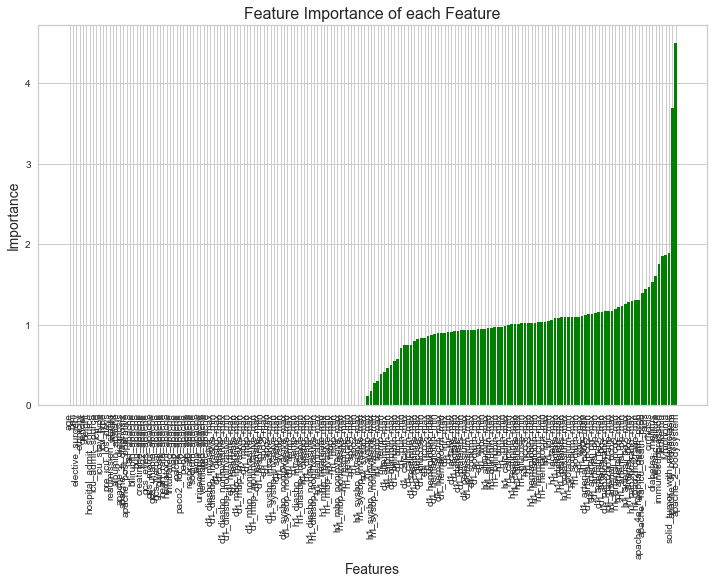

In [51]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(feature_names, importance*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

In [52]:
print("old shape", X.shape)
X=X[top_columns]
print("new shape", X.shape)

old shape (91713, 182)
new shape (91713, 9)


In [ ]:
#df.to_csv("../dataset/X.csv")

In [53]:
X.columns

Index(['apache_2_bodysystem', 'solid_tumor_with_metastasis', 'lymphoma',
       'leukemia', 'immunosuppression', 'hepatic_failure', 'diabetes_mellitus',
       'cirrhosis', 'aids'],
      dtype='object')

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

y = df['hospital_death']
y.head()

In [54]:
print(X.shape)
print(y.shape)

(91713, 9)
(91713,)


In [55]:
# Splitting data into training and testing sets with Test Data as 35%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (59613, 9)
y_train shape:  (59613,)
X_test shape:  (32100, 9)
y_test shape:  (32100,)


In [56]:
X_train.head()

,apache_2_bodysystem,solid_tumor_with_metastasis,lymphoma,leukemia,immunosuppression,hepatic_failure,diabetes_mellitus,cirrhosis,aids
76233,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55784,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14238,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88067,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: hospital_death, dtype: int64

<a name = Section73></a>
### **7.3 Data Scaling**

- Now, evaluating model with help of scaling the data.

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [59]:
X_test = sc.transform(X_test)

In [60]:
import joblib

In [62]:
# save the model
joblib.dump(sc,'../model/sc.pkl')
sc_clf = joblib.load('../model/sc.pkl')

<a name = Section8></a>

---
# **8. Model Development & Evaluation using Deep Learning**
---

- Here we will develop deep learning model.

In [63]:
# Neural network
model = Sequential()
model.add(Dense(6, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0]
b_init = weights[1]
print("Logistic regression model is initialized with weights - {} and biases - {}".format(w_init, b_init))

Logistic regression model is initialized with weights - [[-0.032  0.379  0.552  0.551 -0.242 -0.314]
 [ 0.411  0.302 -0.274 -0.294  0.153  0.5  ]
 [-0.226 -0.397  0.316 -0.621  0.286 -0.193]
 [-0.221 -0.123  0.318 -0.554  0.353 -0.228]
 [-0.591 -0.299  0.033  0.027 -0.465 -0.187]
 [-0.372 -0.367 -0.04   0.198  0.108 -0.526]
 [ 0.415 -0.303  0.328 -0.18  -0.554  0.565]
 [-0.209 -0.619 -0.228 -0.275 -0.514  0.322]
 [ 0.092 -0.173  0.523 -0.291  0.594  0.628]] and biases - [0. 0. 0. 0. 0. 0.]


In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 60        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


Training step is simple in keras. model.fit is used to train it.

In [66]:
history = model.fit(X_train, y_train, epochs=30, batch_size=200, verbose=1)
# Epochs are the number of iterations for training. Verbose can be switched to 0 if you don't want to print 
# the step-wise training loss. Try it.

Epoch 1/30
299/299 [==============================] - 5s 3ms/step - loss: 0.5644 - accuracy: 0.7664
Epoch 2/30
299/299 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.9131
Epoch 3/30
299/299 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.9131
Epoch 4/30
299/299 [==============================] - 1s 3ms/step - loss: 0.2949 - accuracy: 0.9131
Epoch 5/30
299/299 [==============================] - 1s 2ms/step - loss: 0.2943 - accuracy: 0.9131
Epoch 6/30
299/299 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.9131
Epoch 7/30
299/299 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.9131
Epoch 8/30
299/299 [==============================] - 1s 2ms/step - loss: 0.2933 - accuracy: 0.9131
Epoch 9/30
299/299 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.9131
Epoch 10/30
299/299 [==============================] - 1s 2ms/step - loss: 0.2931 - accuracy: 0.9131

In [67]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
25,0.291726,0.913056,25
26,0.291730,0.913056,26
27,0.291723,0.913056,27
28,0.291607,0.913056,28
29,0.291621,0.913056,29


In [68]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

1863/1863 [==============================] - 3s 2ms/step - loss: 0.2915 - accuracy: 0.9131
Training Accuracy: 91.31


In [69]:
test_predictions = model.predict(X_test).flatten()

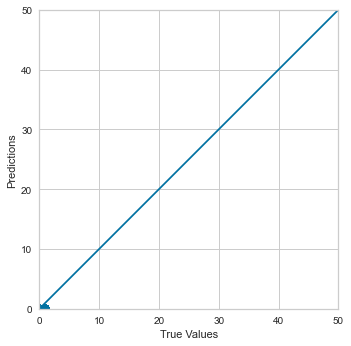

In [70]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

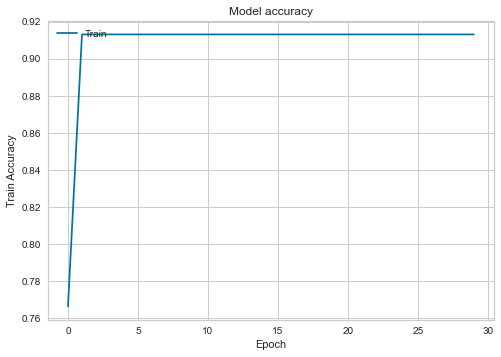

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

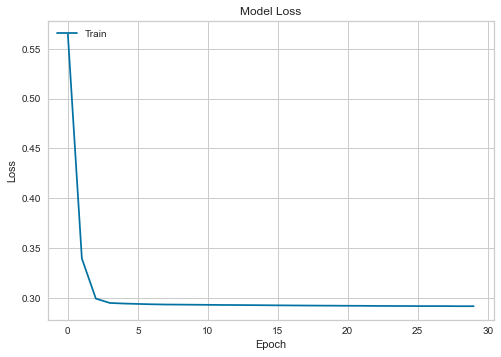

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [73]:
print('\nTesting ------------')
cost = model.evaluate(X_test, y_test, batch_size=400)
print('test cost:', cost)
weights = model.layers[0].get_weights()
W = weights[0]
b = weights[1]
print('Weights=', W, '\nbiases=', b)


Testing ------------
81/81 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9149
test cost: [0.2879677712917328, 0.9148909449577332]
Weights= [[ 0.137  0.096  0.856  1.052 -0.595 -0.158]
 [ 0.411  0.302 -0.274 -0.294  0.153  0.5  ]
 [-0.226 -0.397  0.316 -0.621  0.286 -0.193]
 [-0.221 -0.123  0.318 -0.554  0.353 -0.228]
 [-0.591 -0.299  0.033  0.027 -0.465 -0.187]
 [-0.372 -0.367 -0.04   0.198  0.108 -0.526]
 [ 0.415 -0.303  0.328 -0.18  -0.554  0.565]
 [-0.209 -0.619 -0.228 -0.275 -0.514  0.322]
 [ 0.092 -0.173  0.523 -0.291  0.594  0.628]] 
biases= [ 0.481 -0.228 -0.151  0.948  0.763 -0.152]


1004/1004 [==============================] - 2s 2ms/step - loss: 0.2880 - accuracy: 0.9149


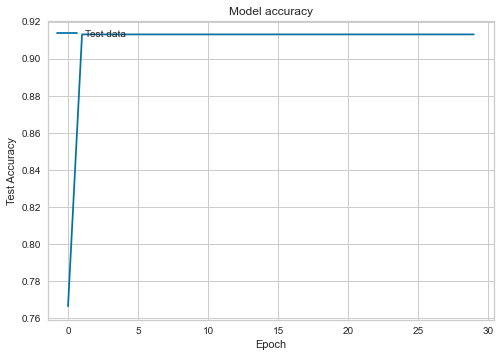

In [74]:
import matplotlib.pyplot as plt
_, accuracy = model.evaluate(X_test, y_test)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test data'], loc='upper left')
plt.show()

<a name = Section9></a>

---
# **9. Saving and loading the keras model**
---

- In this section we will **see how to save and load the model**

In [75]:
# saving the model
model.save('../model/keras_model.h5')

In [76]:
#loading the model 
from keras.models import load_model
model = load_model('../model/keras_model.h5')